# Proszę zaimplementować rekurencyjną LU faktoryzację bazując na swoim rekurencyjnym mnożeniu i odwracaniu macierzy


In [1]:
import random


### Tworzenie macierzy

In [2]:
def createMatrix(size):
    matrix = []
    for i in range(size):
        matrix.append([])
        for j in range(size):
            matrix[i].append(random.uniform(0, 1))
    return matrix

### Wyświetlenie macierzy

In [3]:
def printMatrix(matrix):
    for row in matrix:
        print(row)

In [4]:
matrix1 = createMatrix(4)
printMatrix(matrix1)

[0.16126005648870045, 0.2497789266879168, 0.1623208730375859, 0.4608279470827492]
[0.05967271192874235, 0.04504973568156201, 0.8836797005812337, 0.5534765250012055]
[0.8361585377432628, 0.16914286312554538, 0.8116217641715747, 0.017604105288181904]
[0.5674671462034744, 0.9412267631919919, 0.6472712845088986, 0.10185164102266464]


## LU faktoryzacja metodą Doolitle'a

In [5]:
from LU_factorization import doolittleLUFactorization, doolittleLUFactorizationWithOperationCounting

## Blokowa LU factoryzacja - pseudokod albo wzór

In [6]:
from LU_factorization import LUBlockFactorization, LUBlockFactorizationWithOperationCounting


## Porównanie metod faktoryzacji

In [7]:
L, U = doolittleLUFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[0.37004025192638845, 1.0, 0.0, 0.0]
[5.185155927325702, 23.76603973250693, 1.0, 0.0]
[3.518956637865478, -1.3142147422033565, -0.05909365665444488, 1.0]



[0.16126005648870045, 0.2497789266879168, 0.1623208730375859, 0.4608279470827492]
[0.0, -0.04737852127593763, 0.8236144438294941, 0.38295163536798454]
[0.0, 0.0, -19.604090869106297, -11.473104437789296]
[0.0, 0.0, 0.0, -1.6944889319339156]


In [8]:
L, U = LUBlockFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[0.37004025192638845, 1.0, 0.0, 0.0]
[5.185155927325702, 23.766039732506925, 1.0, 0.0]
[3.518956637865478, -1.3142147422033545, -0.05909365665444482, 1.0]



[0.16126005648870045, 0.2497789266879168, 0.1623208730375859, 0.4608279470827492]
[0.0, -0.04737852127593763, 0.8236144438294941, 0.38295163536798454]
[0.0, 0.0, -19.604090869106294, -11.473104437789294]
[0.0, 0.0, 0.0, -1.6944889319339156]


## Test poprawności metod

In [9]:
from multiplication import hybridMultiplication, sub

In [10]:
L1, U1 = doolittleLUFactorization(matrix1)
L2, U2 = LUBlockFactorization(matrix1)

dolittleError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L1, U1, 2**4))])
blockError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L2, U2, 2**4))])

print(dolittleError)
print(blockError)

-1.887379141862766e-15
-1.9984014443252818e-15


## TODO Wartości własne i wyznacznik

In [11]:
matrices = [createMatrix(2**x) for x in range(1,10)]
sizes = [x for x in range(1,10)]

In [12]:
from LU_factorization import getEigenValues, calculateDeterminant

In [13]:
matrixEgienL = []
matrixDeterminantL = []

matrixEgienU = []
matrixDeterminantU = []

for matrix in matrices:
    L, U = LUBlockFactorization(matrix)
    matrixEgienL.append(getEigenValues(L))
    matrixDeterminantL.append(calculateDeterminant(L))
    matrixEgienU.append(getEigenValues(U))
    matrixDeterminantU.append(calculateDeterminant(U))

In [14]:
print(matrixEgienL[1])
print(matrixDeterminantL[1])
print(matrixEgienU[1])
print(matrixDeterminantU[1])

[1.0, 1.0, 1.0, 1.0]
1.0
[0.4458269435738179, 0.40233076684252367, -1.7226179858179895, 0.08293860600888196]
-0.02562685228443868


In [15]:
print(getEigenValues(U1))
print(calculateDeterminant(U1))

[0.16126005648870045, -0.04737852127593763, -19.604090869106297, -1.6944889319339156]
-0.25380124773684504


In [16]:
print(getEigenValues(U2))
print(calculateDeterminant(U2))

[0.16126005648870045, -0.04737852127593763, -19.604090869106294, -1.6944889319339156]
-0.25380124773684504


## TODO Testy czasowe

In [17]:
import timeit
def calculateRunningTime(funct,matrix):
    start = timeit.default_timer()
    funct(matrix)
    stop = timeit.default_timer()
    return (stop - start)


In [18]:
matrixTimes1 = []
matrixTimes2 = []

for matrix in matrices:
    matrixTimes1.append(calculateRunningTime(doolittleLUFactorization, matrix))
    matrixTimes2.append(calculateRunningTime(LUBlockFactorization, matrix))

In [19]:
print(matrixTimes1)
print('\n')
print(matrixTimes2)

[1.460000203223899e-05, 1.7799997294787318e-05, 5.980000423733145e-05, 0.00025800000003073364, 0.001563899997563567, 0.010822199998074211, 0.07623900000180583, 0.5550072999976692, 5.723519299994223]


[9.000003046821803e-06, 0.00017020000086631626, 0.0003811000060522929, 0.002123100006429013, 0.0132826000044588, 0.05093029999989085, 0.3264234000016586, 2.512149900001532, 19.20730960000219]


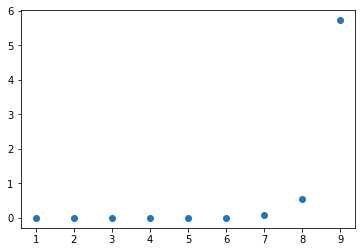

In [20]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixTimes1)
plt.show()

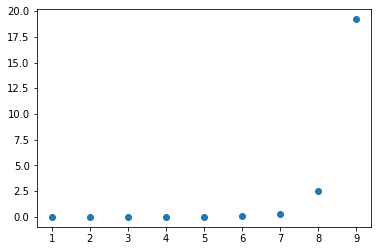

In [21]:
plt.scatter(sizes, matrixTimes2)
plt.show()

## TODO Ilość operacji

In [22]:
from multiplication import hybridMultiplicationWithOperationCounting, sub

matrixOperations1 = []
matrixOperations2 = []



for matrix in matrices:
    L1, U1, fpOperations1 = doolittleLUFactorizationWithOperationCounting(matrix)
    L2, U2, fpOperations2 = LUBlockFactorizationWithOperationCounting(matrix)

    matrixOperations1.append(fpOperations1)
    matrixOperations2.append(fpOperations2)


In [23]:
print(matrixOperations1)
print(matrixOperations2)

[3, 34, 308, 2600, 21328, 172704, 1389888, 11152000, 89347328]
[3, 122, 1300, 11208, 91856, 719008, 5488832, 40475392, 291857024]


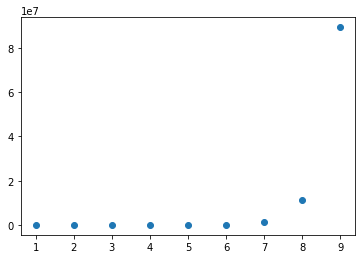

In [24]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixOperations1)
plt.show()

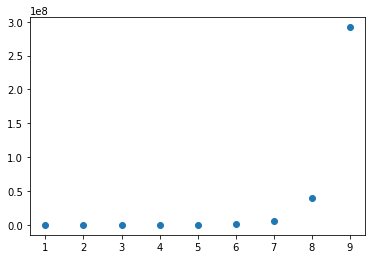

In [25]:
plt.scatter(sizes, matrixOperations2)
plt.show()

In [26]:
for idx, matrix in enumerate(matrices, start=1):
    with open(f'matrices/{idx}.txt', 'a+') as f:
        for row in matrix:
            f.write("%s\n" % str(row)[1:-1])

In [36]:
print(len(matrixEgienL))

9


In [37]:
for i in range(0,9):

    with open(f'matrices/c/{i+1}c.txt', 'a+') as f:
        f.write("%s\n" % str(matrixEgienL[i])[1:-1])
        f.write("%s\n" % str(matrixDeterminantL[i]))
        f.write("%s\n" % str(matrixEgienU[i])[1:-1])
        f.write("%s\n" % str(matrixDeterminantU[i]))